### Imports

In [129]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.utils import to_categorical

%matplotlib inline

### Load Data and Clean

In [137]:
data = pd.read_csv('face_dataset.csv')

labels = data

In [4]:
data.head()

,image_id,age,gender,ethnicity
0,lhdattxcqr,100,0,0
1,lbhumkpyaq,100,0,0
2,cafqfjecpw,100,1,0
3,wpintedrvx,100,1,0
4,pepixqcuhh,100,1,0


In [5]:
data.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


In [26]:
data.dtypes

image_id     object
age           int64
gender        int64
ethnicity    object
dtype: object

> While building the dataset there were some error in the image name. Due to this few image labels for ethnicity is incorrect. `ethnicity` should be int dtype but due to error in the image names it's object dtype.

In [7]:
print("Unique values in gender; ", data['gender'].unique())

Unique values in gender;  [0 1]


In [8]:
print("Unique values in ethnicity; ", data['ethnicity'].unique())

Unique values in ethnicity;  ['0' '2' '1' '3' '4' '20170116174525125.jpg.chip.jpg'
 '20170109142408075.jpg.chip.jpg' '20170109150557335.jpg.chip.jpg']


> We have three damaged data points. 

In [138]:
### Clean Data

data = data[data.ethnicity != '20170109150557335.jpg.chip.jpg']
data = data[data.ethnicity != '20170116174525125.jpg.chip.jpg']
data = data[data.ethnicity != '20170109142408075.jpg.chip.jpg']

data = data.astype({'ethnicity': 'int64'})

In [37]:
print("Total number of data we have: ", len(data))

Total number of data we have:  23705


In [39]:
data.describe()

,age,gender,ethnicity
count,23705.000000,23705.000000,23705.000000
mean,33.300907,0.477283,1.269226
std,19.885708,0.499494,1.345638
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000
max,116.000000,1.000000,4.000000


In [45]:
data.dtypes

image_id     object
age           int64
gender        int64
ethnicity     int64
dtype: object

### Age

In [38]:
ages = data['age'].unique()
ages.sort()
print("Unique values in age; ", ages)

Unique values in age;  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


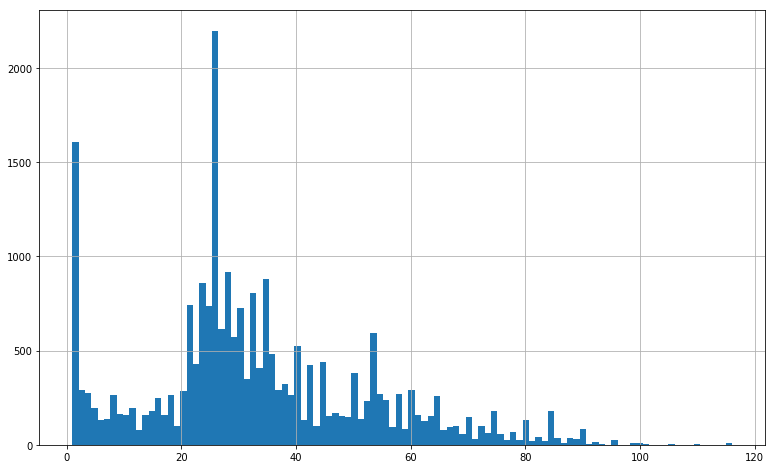

In [48]:
plt.figure(figsize=(13,8))
data['age'].hist(bins=len(ages));

In [58]:
data.groupby('age').count().sort_values('image_id', ascending=False).head(10)

,image_id,gender,ethnicity
age,,,
26,2197,2197,2197
1,1123,1123,1123
28,918,918,918
35,880,880,880
24,859,859,859
25,734,734,734
30,724,724,724
32,664,664,664
27,615,615,615


> The distribution is higly non uniform. Age 26 is dominant followed by age 1. We need to select the data acccordingly.

##### What if we group the data

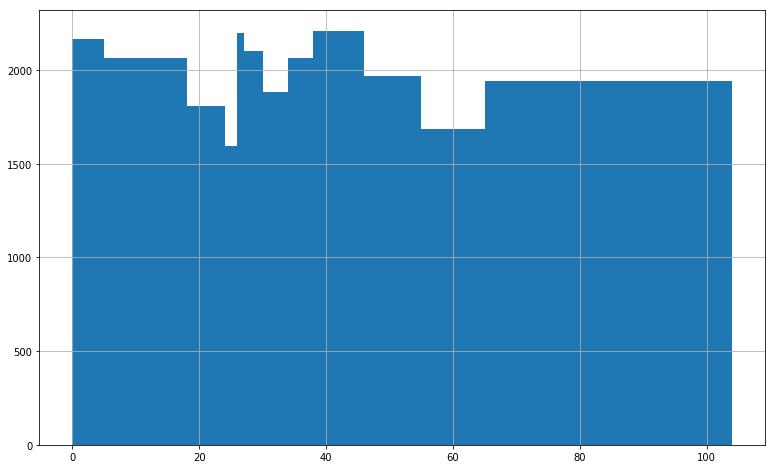

In [115]:
plt.figure(figsize=(13,8))
data['age'].hist(bins=[0, 5, 18, 24, 26, 27, 30, 34, 38, 46, 55, 65, len(ages)]);

> Regression became a classification problem

### Gender

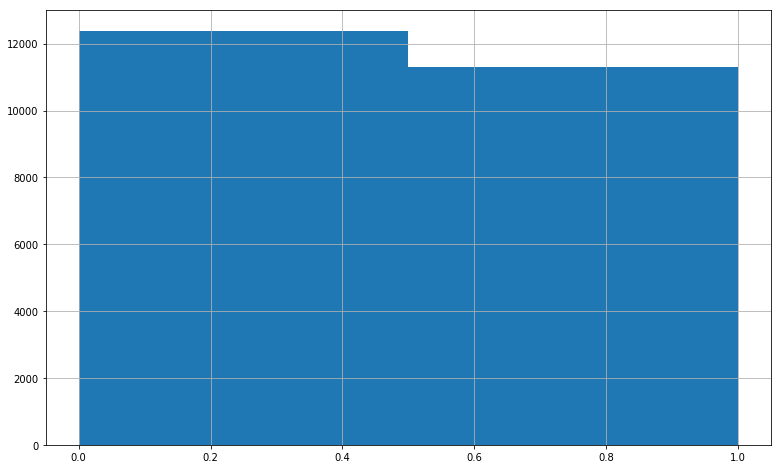

In [22]:
genders = data['gender'].unique()

plt.figure(figsize=(13,8))
data['gender'].hist(bins=len(genders));

> The data is good to go

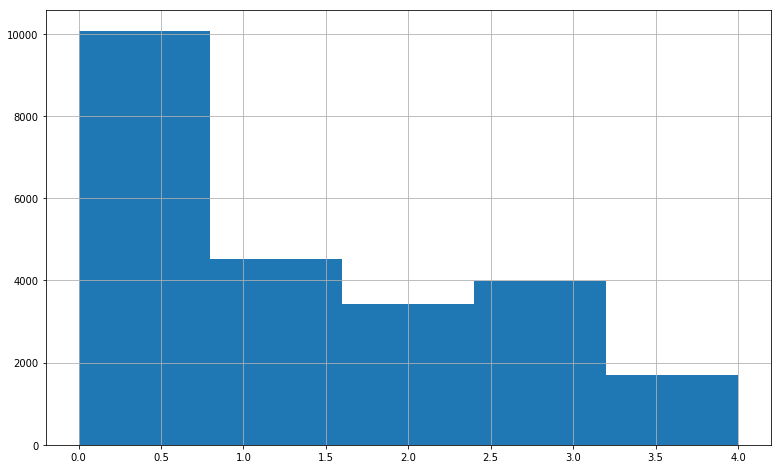

In [46]:
ethnicity = data['ethnicity'].unique()

plt.figure(figsize=(13,8))
data['ethnicity'].hist(bins=len(ethnicity));

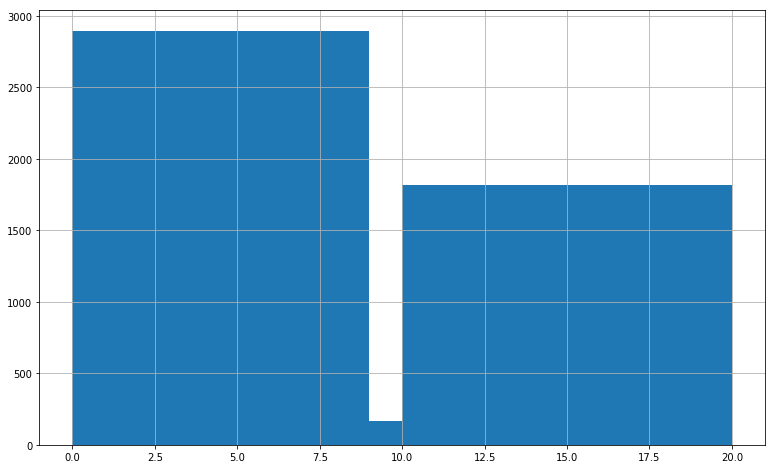

In [142]:
plt.figure(figsize=(13,8))
data['age'].hist(bins=[0, 9, 10, 20]);